In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from plot_prop import *
from plot_projections import *
from plot_param import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from new_projections import *
from parameters import *
from output_xfoil import *

In [4]:
#theoretical_bt = [21.11, 23.9, 24.65, 24.11, 22.78, 21.01, 19, 17.06, 15.33, 13.82, 12.51, 11.36, 10.27, 9.32, 8.36, 7.27, 6.15, 5.04] 
#theoretical_cl = [0.109, 0.132, 0.156, 0.176, 0.193, 0.206, 0.216, 0.223, 0.226, 0.225, 0.219, 0.21, 0.197, 0.179, 0.157, 0.13, 0.087, 0.042]

theoretical_bt = [23.9, 24.65, 24.11, 22.78, 21.01, 19, 17.06, 15.33, 13.82, 12.51, 11.36, 10.27, 9.32, 8.36, 7.27, 6.15, 5.04] 
theoretical_cl = [0.132, 0.156, 0.176, 0.193, 0.206, 0.216, 0.223, 0.226, 0.225, 0.219, 0.21, 0.197, 0.179, 0.157, 0.13, 0.087, 0.042]

In [5]:
propeller = pd.read_csv('propeller_data.csv')

In [6]:
positions = [40, 70]
#positions = np.linspace(20, 100, 17).tolist()

In [7]:
#####################################################################################################
##########################            PRE-PROCESSING            #####################################
#####################################################################################################
propeller_coords, vect_length, vect_out, vect_side = prepare_propeller(propeller)

dmiddle, dlowest, dhighest   = d_blade(vect_length, propeller_coords)                     #d of plan ax+by+cx+d = 0
upper_blade, lower_blade     = blade_alone(propeller_coords, vect_length, dmiddle)        #points of each blades

In [8]:
planes = get_planes_xfoil(upper_blade, dmiddle, dhighest, vect_length, positions) #get equations of planes for projection

In [9]:
all_plane_points = get_points(upper_blade, planes)                   #get points used for each projection

Points of plane 1
Points of plane 2


In [10]:
#####################################################################################################
##########################              PROJECTION              #####################################
#####################################################################################################
right_param, left_param, right_pts, left_pts = get_all_projections(planes, all_plane_points)

10
13
7
10


In [11]:
a = np.linspace(0, 1, 26)
b = np.linspace(0.01, 0.10, 10)
c = np.linspace(0.90, 0.99, 10)

_all = np.sort(np.hstack((a, b, c)))

In [12]:
_all

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.04, 0.05, 0.06, 0.07, 0.08, 0.08,
       0.09, 0.1 , 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 , 0.44,
       0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84, 0.88,
       0.9 , 0.91, 0.92, 0.92, 0.93, 0.94, 0.95, 0.96, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [13]:
x_list, y_right_list, y_left_list, rm = get_generated_points_xfoil(right_param, left_param, right_pts, left_pts)

[-15.61380922 -15.60380922 -14.98802898 -14.37224874 -13.96506191
 -13.75646849 -13.14068825 -12.31631459 -10.66756728  -9.01881996
  -7.37007265  -5.72132534  -4.07257802  -2.42383071  -0.77508339
   0.87366392   2.52241123   4.17115855   5.81990586   6.64427952
   7.26005976   7.46865318   7.87584001   8.49162025   9.10740049
   9.11740049]
[-14.93756359 -14.92756359 -14.30884665 -13.69012971 -13.28098509
 -13.07141277 -12.45269583 -11.62440658  -9.96782808  -8.31124958
  -6.65467107  -4.99809257  -3.34151406  -1.68493556  -0.02835706
   1.62822145   3.28479995   4.94137845   6.59795696   7.42624621
   8.04496315   8.25453546   8.66368009   9.28239703   9.90111396
   9.91111396]


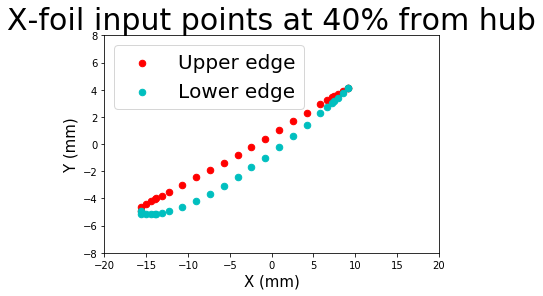

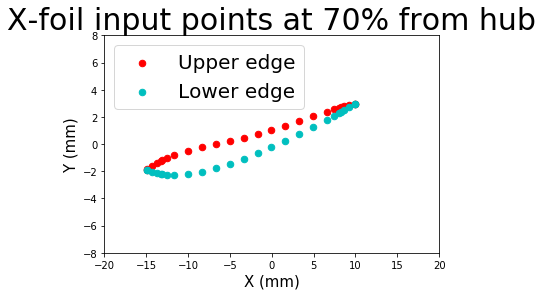

In [14]:
for i in range(len(all_plane_points) - rm):
    plot_xfoil( x_list[i], y_right_list[i], y_left_list[i], positions[i] )

In [15]:
#blade_twist = xfoil_get_blade_twist(x, y_right_list, y_left_list)
tip_radius = get_tip_radius(propeller_coords)
blade_twist = get_blade_twist(x_list, y_right_list, y_left_list)
chord_length = get_chord_length(x_list, y_right_list, y_left_list)
chord_length_normalized = [x/tip_radius for x in chord_length]

In [ ]:
plot_blade_twist_comparison(blade_twist, theoretical_bt[:-1], positions[:-1])

error_blade_twist = param_mean_error(blade_twist, theoretical_bt[:-1])
print("Mean error blade twist " + str(error_blade_twist))

rmse_blade_twist = param_RMSE(blade_twist, theoretical_bt[:-1])
print("RMSE blade twist " + str(rmse_blade_twist))

In [ ]:
plot_chord_length_comparison(chord_length_normalized, theoretical_cl[:-1], positions[:-1])

error_chord_length = param_mean_error(chord_length_normalized, theoretical_cl[:-1])
print("Mean error chord length " + str(error_chord_length))

rmse_chord_length = param_RMSE(chord_length_normalized, theoretical_cl[:-1])
print("RMSE chord length " + str(rmse_chord_length))

In [17]:
x_r_rotated, y_r_rotated, x_l_rotated, y_l_rotated = align_aerofoil(x_list, y_right_list, y_left_list, blade_twist)

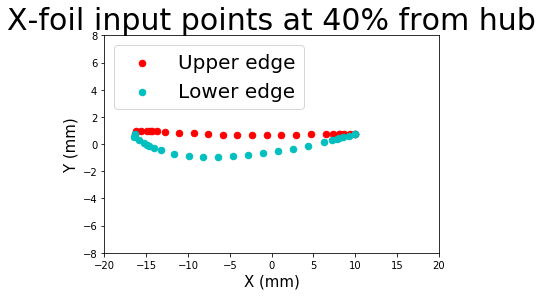

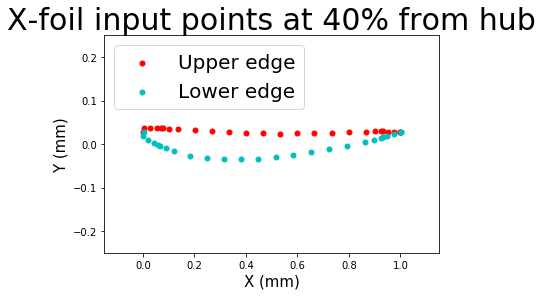

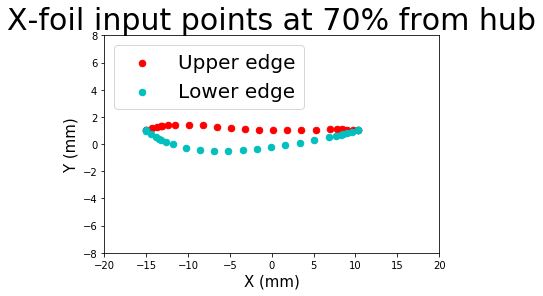

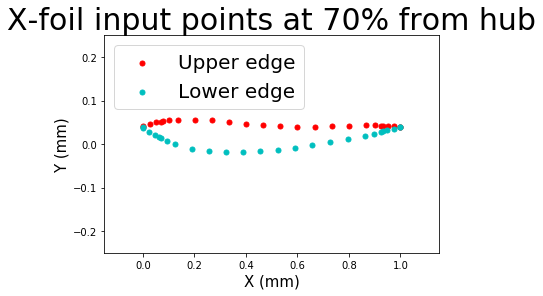

In [18]:
for i in range(len(all_plane_points) - rm):
    plot_xfoil_aligned(x_r_rotated[i], y_r_rotated[i], x_l_rotated[i], y_l_rotated[i], positions[i])
    plot_xfoil_scaled( x_r_rotated[i], y_r_rotated[i], x_l_rotated[i], y_l_rotated[i], positions[i]) 

In [19]:
def xfoil_input_data(x_r, y_right, x_l, y_left, position):
    #fichier avec x et y dans l'ordre puis x et y_left reversed
    length = len(x_r)
    scale = max(max(x_r) - min(x_r), max(x_l) - min(x_l))

    right = np.zeros([length, 2])    
    right[:, 0] = x_r - min(x_r)
    right[:, 1] = y_right
    right = right/scale
    #right[0,1] = 0
    right[length-1, 0] = 1
    if(right[length-2,0] >= 1):
        print("nop_r1")
        right = np.delete(right,(length-2), axis=0)
        
    if(right[0,0]>right[1, 0]):
        #delete 1,0
        print("nop_r2")
        right = np.delete(right,(1), axis=0)
    
    print(right)
    print("\n")

    left  = np.zeros([length, 2])
    left[:, 0] = x_l[::-1] - min(x_l)
    left[:, 1] = y_left[::-1]
    left = left/scale
    left[0, 0] = 1
    left[length-1,0] = 0
    
    if(left[length-2,0] <= 0):
        print("nop_l1")
        left = np.delete(left,(length-2), axis=0)
        
    if(left[0,0]<left[1, 0]):
        #delete 1,0
        print("nop_l2")
        left = np.delete(left,(1), axis=0)

    print(left)
    print("\n")
    
    xy = np.vstack((right, left))
    #print(xy)
    filename = "XFOIL6.99/xfoil" + str(position) + ".txt"

    np.savetxt(filename, xy)

In [20]:
for i, pos in enumerate(positions):
    xfoil_input_data(x_r_rotated[i], y_right_list[i], x_l_rotated[i], y_left_list[i], pos)

[[ 0.         -0.18556624]
 [ 0.00366253 -0.17589965]
 [ 0.02846219 -0.16748596]
 [ 0.05318578 -0.15929468]
 [ 0.0694984  -0.15398325]
 [ 0.07784523 -0.15129092]
 [ 0.10245179 -0.14344177]
 [ 0.13532931 -0.1331221 ]
 [ 0.20094886 -0.11287888]
 [ 0.26651988 -0.09277753]
 [ 0.33217103 -0.07244193]
 [ 0.39799677 -0.0515959 ]
 [ 0.4640574  -0.03006321]
 [ 0.530379   -0.00776755]
 [ 0.59695349  0.01526744]
 [ 0.6637386   0.03891818]
 [ 0.73065788  0.06296115]
 [ 0.79760069  0.0870729 ]
 [ 0.86442219  0.11083002]
 [ 0.89773285  0.12241596]
 [ 0.92255098  0.13088364]
 [ 0.93094338  0.13370918]
 [ 0.94730186  0.13915469]
 [ 0.97197337  0.14719371]
 [ 0.99655274  0.15496337]
 [ 1.          0.15549568]]


nop_l1
[[ 1.          0.15549568]
 [ 0.99970598  0.15567689]
 [ 0.97305689  0.14185643]
 [ 0.94652232  0.12837074]
 [ 0.92903428  0.119623  ]
 [ 0.92009238  0.11519097]
 [ 0.89375805  0.10229071]
 [ 0.85863861  0.08541682]
 [ 0.7888038   0.05285034]
 [ 0.71942441  0.02161525]
 [ 0.65043842 -0.0